# Surface regression using 1-hidden layer MLP

## Introduction
Objective: use a MLP as a regressor for 2D surface reconstruction

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Global parameters

In [10]:
num_hidden = 5      # number of neurons in the hidden layer
num_epochs = 500     # number of training epochs
num_points = 100    # number of points for surface display

## Library of functions

In [11]:
# domain definition
#xmin,xmax =  -10,10
#ymin,ymax =  -10,10
#num_samples = 400   # number of sample point for the training 
#f = lambda x, y: 0.01*np.sin(np.sqrt(x*x + y*y + 1))/np.sqrt(x*x + y*y + 1)

#xmin,xmax =  -1,1
#ymin,ymax =  -1,1
#num_samples = 100
#f =  lambda x, y: np.sin(x) + np.cos(y)*x**2

xmin,xmax =  -3,3
ymin,ymax =  -3,3
num_samples = 100
f =  lambda x, y: 3*np.exp(-(y+1)**2 -x**2)*(x-1)**2 -np.exp(-(x-1)**2-y**2)/3 +np.exp(-x**2-y**2)*(10*x**3-2*x+10*y**5)

# Beale surface
#xmin,xmax =  -4,4
#ymin,ymax =  -4,4
#num_samples = 50
#f =  lambda x, y: (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2

#xmin,xmax =  -4,4
#ymin,ymax =  -4,4
#num_samples = 50
#f =  lambda x, y: (y-(5.1 / (4.*np.pi**2))*x**2+(5. / np.pi)*x-6)+10*(1-(1. / (8.*np.pi)))*np.cos(x)+10



##Surface and sample points.


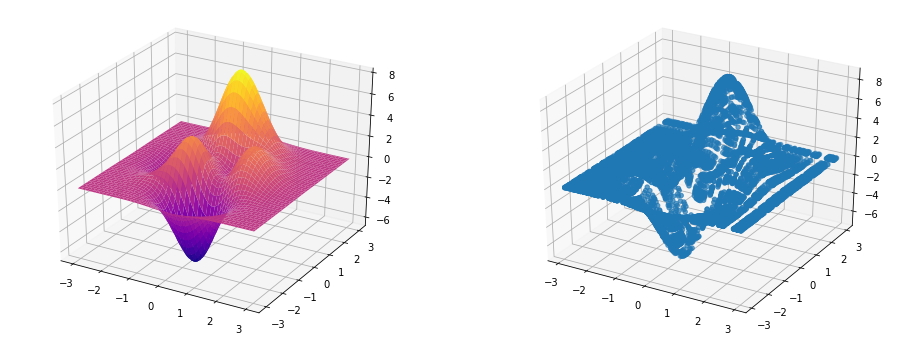

<Figure size 720x720 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, projection='3d')
x = np.linspace(xmin, xmax, num_points)
y = np.linspace(ymin, ymax, num_points)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z, cmap='plasma')

ax = fig.add_subplot(122, projection='3d')
x_train = (xmax-xmin)*np.random.rand(num_samples,1)+xmin
y_train = (ymax-ymin)*np.random.rand(num_samples,1)+ymin
X_train,Y_train = np.meshgrid(x_train,y_train)
Z_train = f(X_train,Y_train)
plt.figure(figsize=(10,10))
ax.scatter(X_train, Y_train, Z_train, cmap='plasma')

plt.tight_layout()

## Network

In [13]:
model = Sequential()
model.add(Dense(input_dim=2,units=num_hidden,activation='tanh',name='dense'))
model.add(Dense(input_dim=num_hidden,units=num_hidden,activation='tanh',name='dense2'))
model.add(Dense(units=1,name='output'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense2 (Dense)               (None, 5)                 30        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse',optimizer="Adam",metrics=['acc'])

## Training

In [15]:
pts = np.transpose(np.vstack([x_train.ravel(), y_train.ravel()]))
hist=model.fit(pts, f(x_train,y_train), epochs=num_epochs, batch_size=1,verbose=0)

## Display results

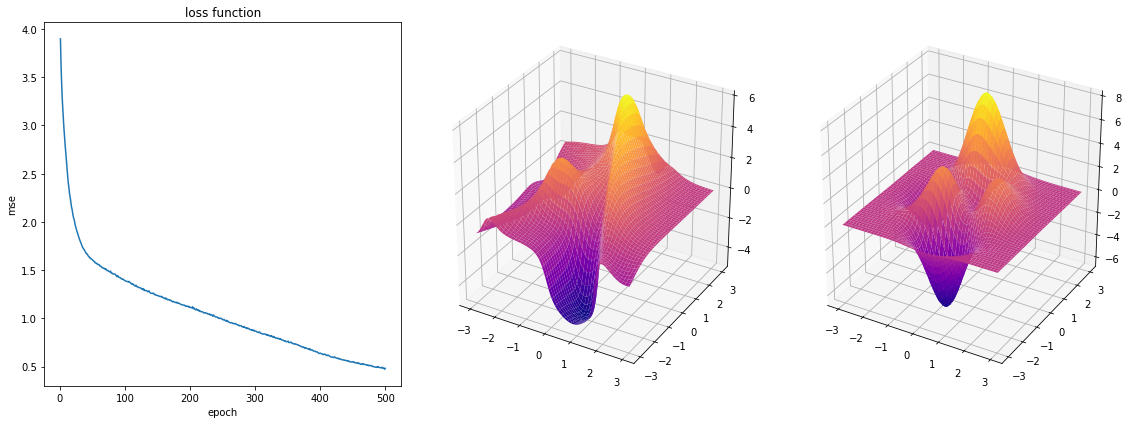

In [16]:
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(131)
iter = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title("loss function")
plt.plot(iter,l)

ax = fig.add_subplot(132, projection='3d')
points = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
z_P = model.predict(points)

z_P=z_P.reshape(num_points,num_points)
ax.plot_surface(X, Y, z_P, cmap='plasma')

ax = fig.add_subplot(133, projection='3d')
x = np.linspace(xmin, xmax, num_points)
y = np.linspace(ymin, ymax, num_points)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z, cmap='plasma')

plt.tight_layout()
